In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Firstly, let's load the dataset
who_data = pd.read_csv("all_data.csv")
who_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [19]:
# let's do some data clean up
# first, let's see a summary stats for dataset
who_data.columns = ["Country", "Year", "Life Expectancy", "GDP"]
who_data.describe(include="all")

,Country,Year,Life Expectancy,GDP
count,96,96.0,96.000000,9.600000e+01
unique,6,16.0,NaN,NaN
top,Chile,2000.0,NaN,NaN
freq,16,6.0,NaN,NaN
mean,NaN,NaN,72.789583,3.880499e+12
std,NaN,NaN,10.672882,5.197561e+12
min,NaN,NaN,44.300000,4.415703e+09
25%,NaN,NaN,74.475000,1.733018e+11
50%,NaN,NaN,76.750000,1.280220e+12
75%,NaN,NaN,78.900000,4.067510e+12


In [4]:
# Let's view the data types
who_data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [9]:
# Our year column is saved as an int but it should be an object
# Let's convert this

who_data["Year"] = who_data["Year"].astype("object")

In [10]:
# Next, let's summarize our data again
who_data.describe(include="all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.0,96.000000,9.600000e+01
unique,6,16.0,NaN,NaN
top,Chile,2000.0,NaN,NaN
freq,16,6.0,NaN,NaN
mean,NaN,NaN,72.789583,3.880499e+12
std,NaN,NaN,10.672882,5.197561e+12
min,NaN,NaN,44.300000,4.415703e+09
25%,NaN,NaN,74.475000,1.733018e+11
50%,NaN,NaN,76.750000,1.280220e+12
75%,NaN,NaN,78.900000,4.067510e+12


In [11]:
# Seems their's no missing data but we can confirm that as well
who_data[who_data.isnull().any(axis=1)]

,Country,Year,Life expectancy at birth (years),GDP


In [13]:
# from our data summary, we can see that both Year and Countries seem to be categorical variables
# Hence, we can zoom in to explore these categories

who_data.Country.value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [17]:
who_data.Year.value_counts()

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64

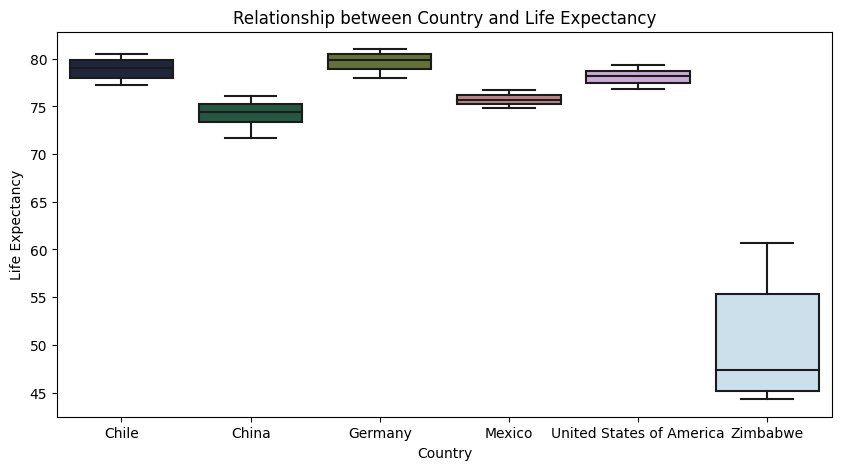

<Figure size 640x480 with 0 Axes>

In [27]:
# We can see that our data consists of equal records for each country and year
# let's view the relationship between the countries and life expectancy using a box plot

plt.figure(figsize=(10,5))
sns.boxplot(x="Country", y="Life Expectancy", data=who_data, palette="cubehelix")
plt.title("Relationship between Country and Life Expectancy")
plt.show()
plt.clf()

In [22]:
# As we can see from the above box plot, while the life expectancy across all 15 years is highest in Germany and also high in another 5 4 countries,
# The life expectancy is much lower in Zimbabwe while also have bigger spread.

# We can visualize this in the distribution across countries below

c:\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


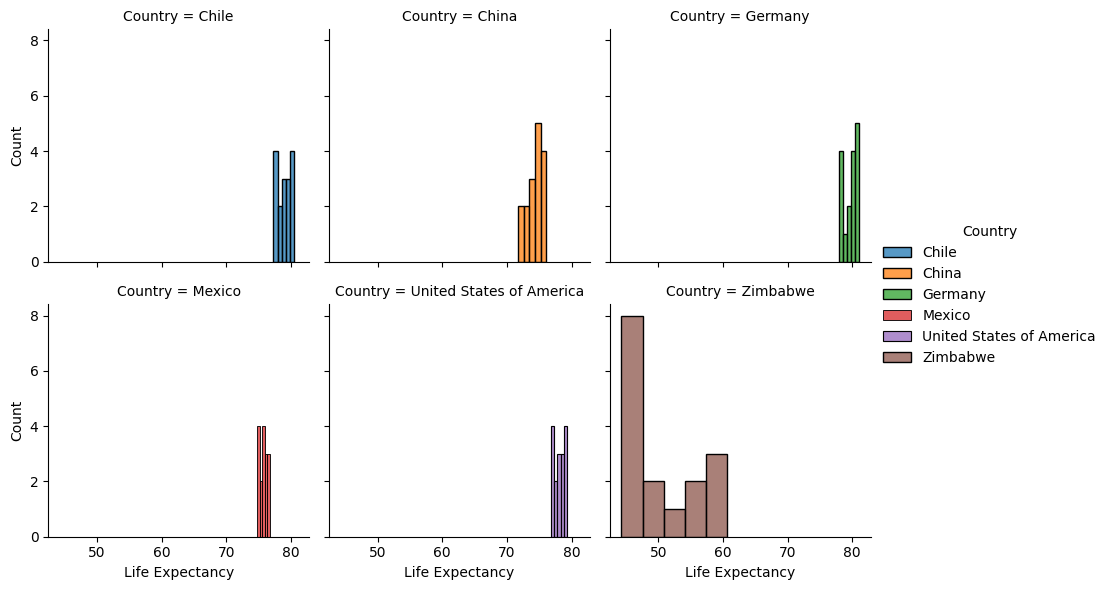

In [43]:
g = sns.FacetGrid(who_data, col="Country", hue="Country", col_wrap=3)
g.map(sns.histplot, "Life Expectancy")
g.add_legend()

c:\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


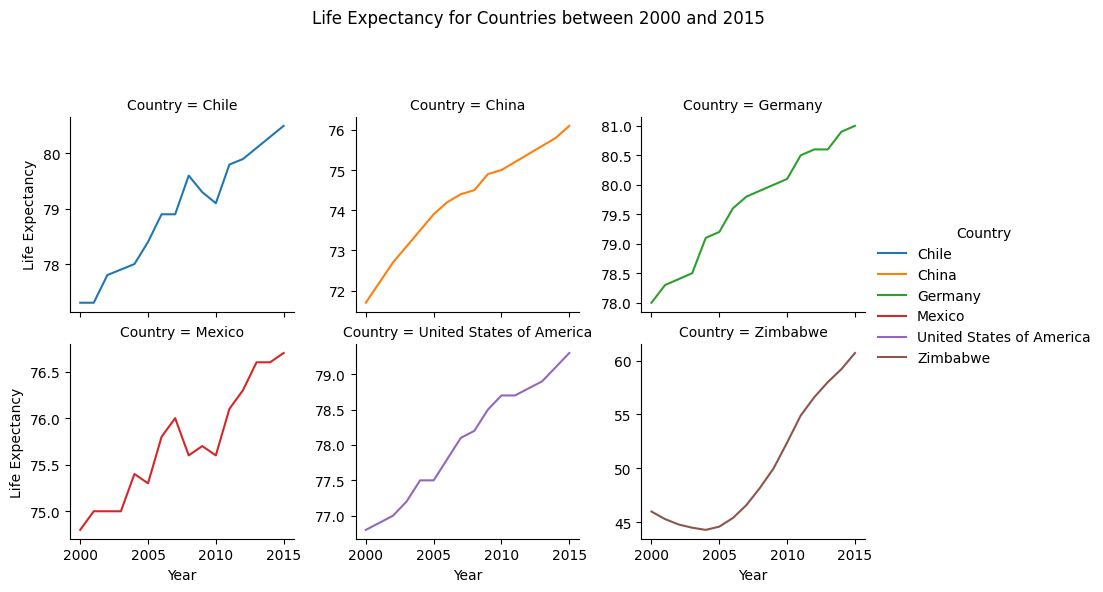

<Figure size 640x480 with 0 Axes>

In [65]:
# The above also gives us more insights into how the life expectancy in these countries are

# Next, let's look at the life expectancy across each year for each country
g = sns.FacetGrid(who_data, col="Country", hue="Country", col_wrap=3, sharey=False)
g.map(sns.lineplot, "Year", "Life Expectancy")
g.add_legend()
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Life Expectancy for Countries between 2000 and 2015")

plt.show()
plt.clf()

In [57]:
# From the above, we can see that over the year, the Life Expectancy of countries have increased. In Countries like China,United States and Germany
# have experienced fewer or no dips in Life Expectancy. Zimbabwe, A country in Africa which although having a smaller life expectancy has experienced
# Constant increased in life expectancy since 2005

c:\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'GDP for Countries between 2000 and 2015')

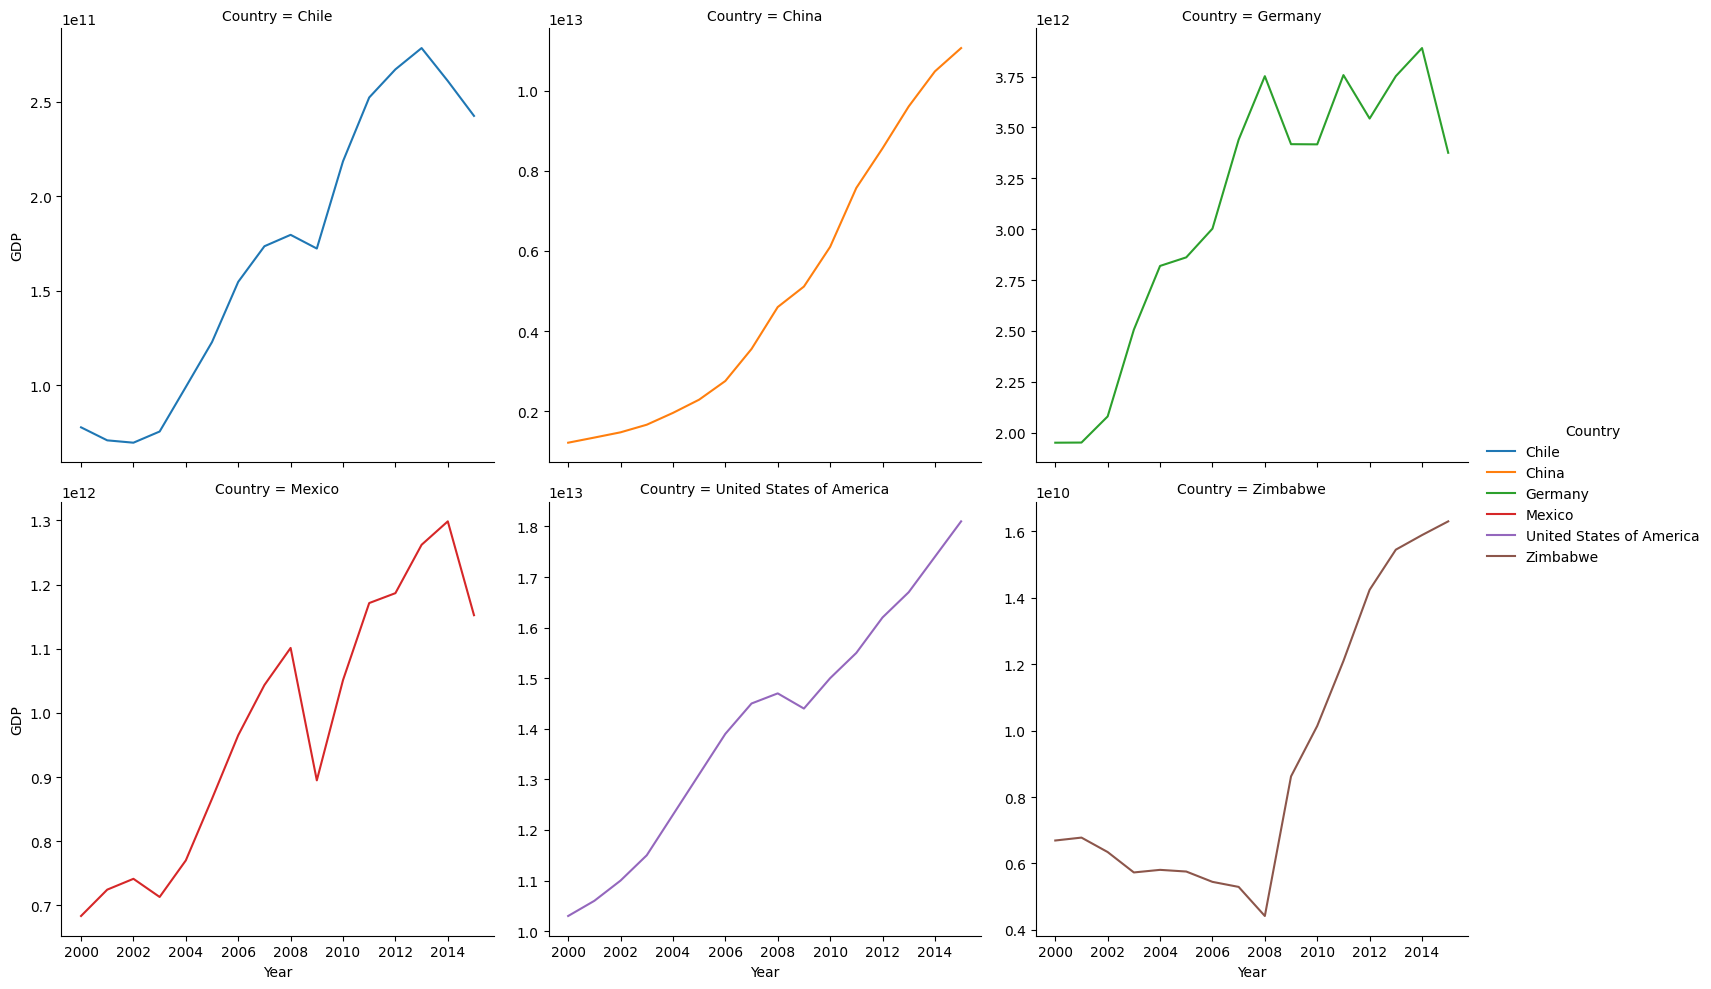

In [66]:
# We can also explore the GDP change over time before exploring the relationship with the Life Expectancy 

sns.relplot(x="Year", y="GDP", data=who_data, col="Country", kind="line", hue="Country", col_wrap=3, facet_kws={'sharey': False})
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("GDP for Countries between 2000 and 2015")

In [ ]:
# Great! Looks Like The GDP of these countries have also grown across the years as well. Although China has experienced much more steady growth
# than the other countries. As we can see, there seems to be correlation between Life Expectancy and GDP. To confirm this, let;s create a scatter plot
# to explore this relationship

